<a href="https://colab.research.google.com/github/Maheen-Siddiqui/Colab-Projects/blob/main/StressDetectionML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Project/stressML.csv', encoding='latin1')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   id                2838 non-null   int64  
 5   label             2838 non-null   int64  
 6   confidence        2838 non-null   float64
 7   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 177.5+ KB
None


In [5]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005


In [6]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
id                  0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [7]:
df["subreddit"].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [8]:
df["subreddit"].value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

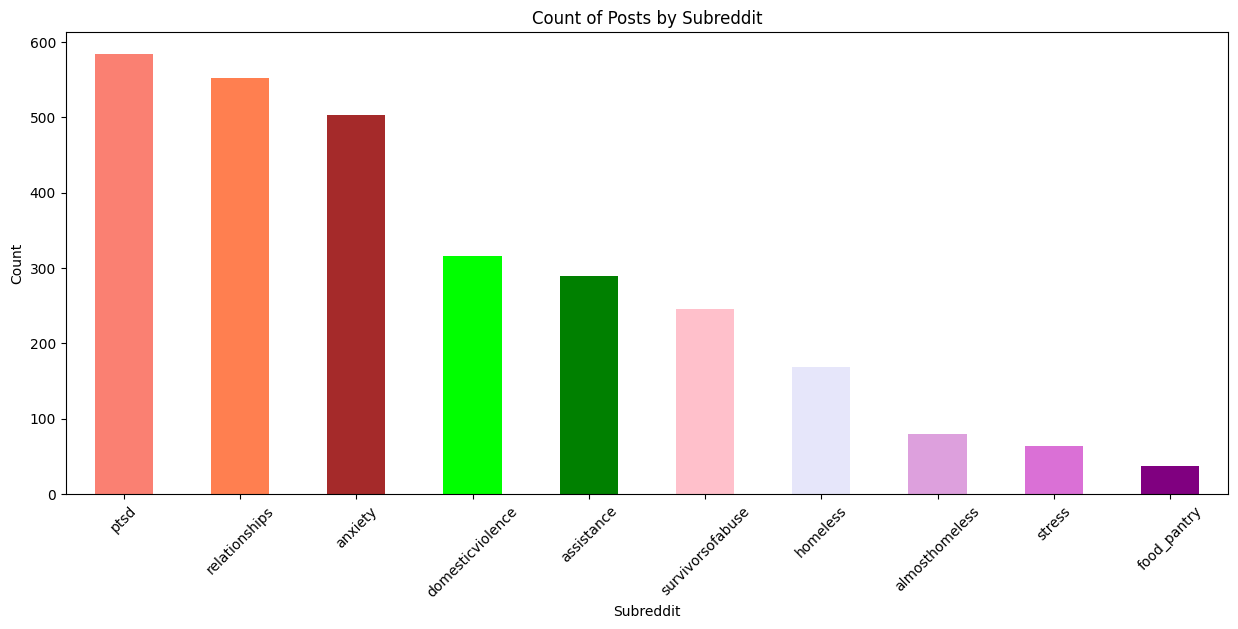

In [9]:
plt.figure(figsize=(15, 6))
colors = ['salmon','coral','brown','lime','green','pink','lavender','plum','orchid','purple']
df['subreddit'].value_counts().plot(kind='bar', color=colors)
plt.xticks(rotation=45)
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.title('Count of Posts by Subreddit')
plt.show()

In [10]:
df["label"].unique()

array([1, 0])

In [11]:
df["label"].value_counts()

1    1488
0    1350
Name: label, dtype: int64

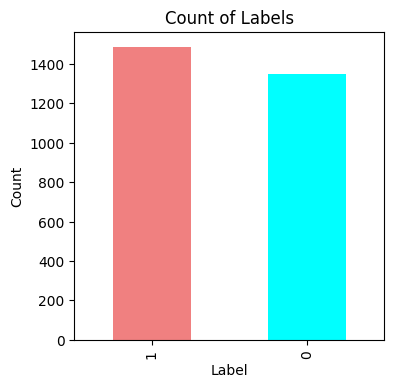

In [12]:
plt.figure(figsize=(4, 4))
colors=['lightcoral','cyan']
df['label'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Labels')
plt.show()

In [ ]:
df.drop(['post_id','id','social_timestamp'],axis='columns',inplace =True)

In [ ]:
df.head()

,subreddit,sentence_range,text,label,confidence
0,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8
1,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0
2,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8
3,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6
4,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8


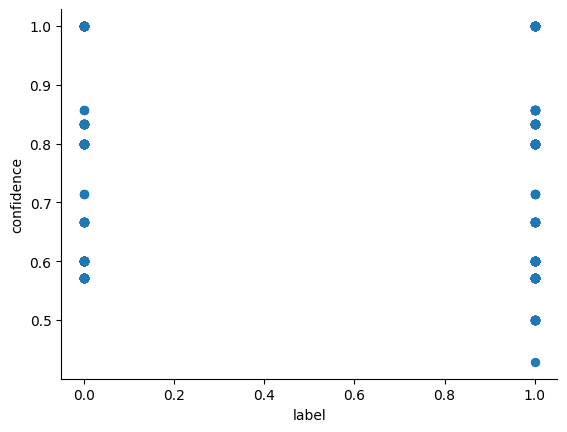

In [ ]:
df.plot(kind='scatter', x='label', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

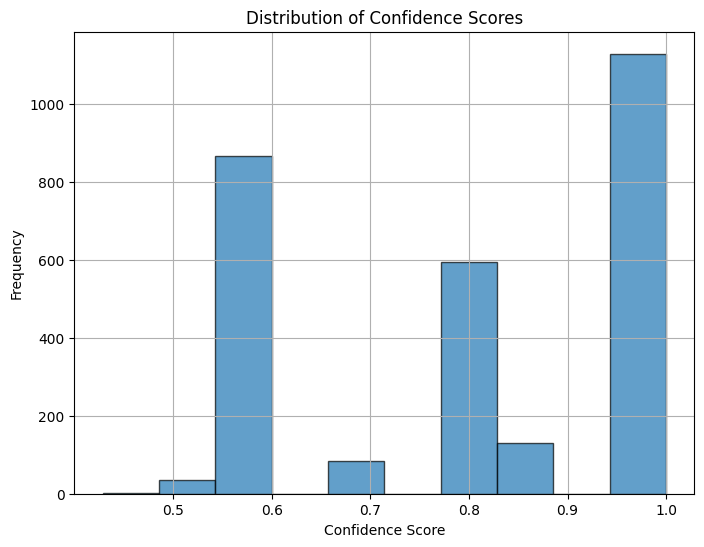

In [ ]:
confidences = df.confidence
plt.figure(figsize=(8, 6))
plt.hist(confidences, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

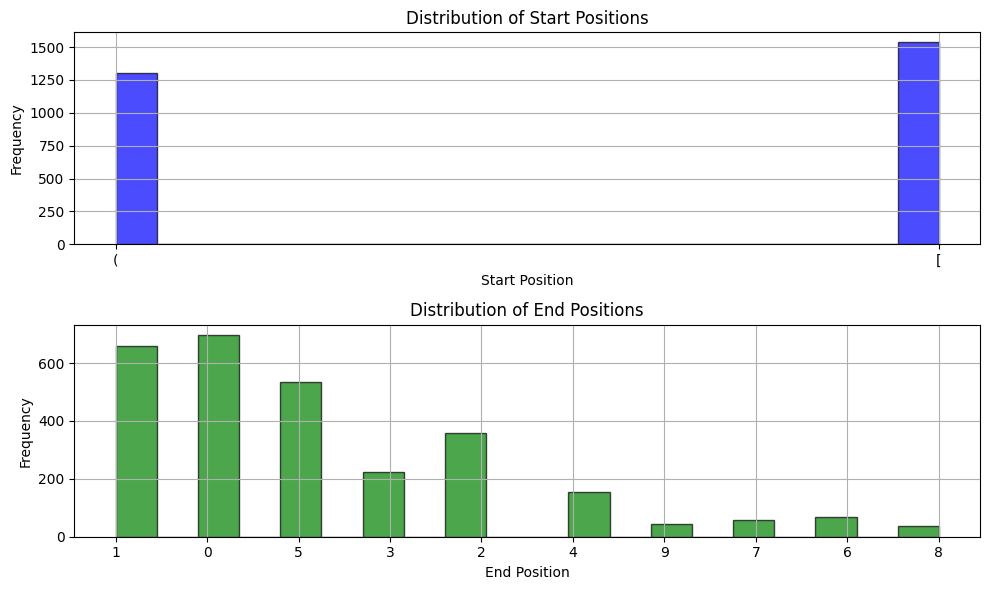

In [ ]:
sentence_ranges = df.sentence_range
start_positions = [x[0] for x in sentence_ranges]
end_positions = [x[1] for x in sentence_ranges]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(start_positions, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Start Positions')
plt.xlabel('Start Position')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.hist(end_positions, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of End Positions')
plt.xlabel('End Position')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

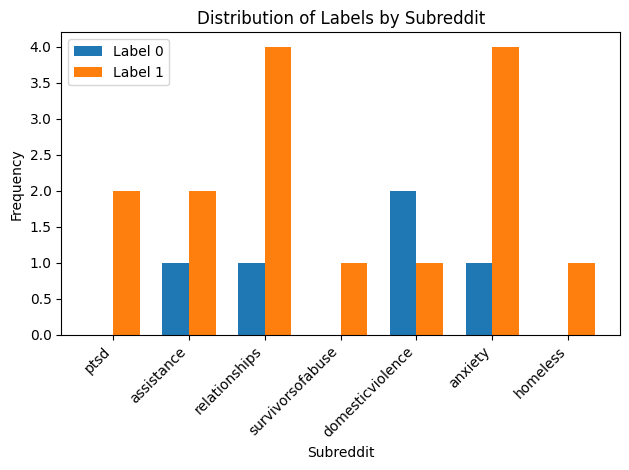

In [ ]:
from collections import defaultdict

data = [
    ("ptsd", 1),
    ("assistance", 0),
    ("ptsd", 1),
    ("relationships", 1),
    ("survivorsofabuse", 1),
    ("relationships", 0),
    ("domesticviolence", 0),
    ("anxiety", 1),
    ("relationships", 1),
    ("assistance", 1),
    ("anxiety", 1),
    ("anxiety", 0),
    ("homeless", 1),
    ("anxiety", 1),
    ("relationships", 1),
    ("anxiety", 1),
    ("domesticviolence", 0),
    ("assistance", 1),
    ("relationships", 1),
    ("domesticviolence", 1)
]

subreddit_label_counts = defaultdict(lambda: defaultdict(int))
for subreddit, label in data:
    subreddit_label_counts[subreddit][label] += 1

subreddits = list(subreddit_label_counts.keys())
labels = ['Label 0', 'Label 1']
label_0_counts = [subreddit_label_counts[subreddit][0] for subreddit in subreddits]
label_1_counts = [subreddit_label_counts[subreddit][1] for subreddit in subreddits]

bar_width = 0.35
index = range(len(subreddits))

plt.bar(index, label_0_counts, bar_width, label='Label 0')
plt.bar([i + bar_width for i in index], label_1_counts, bar_width, label='Label 1')

plt.xlabel('Subreddit')
plt.ylabel('Frequency')
plt.title('Distribution of Labels by Subreddit')
plt.xticks([i + bar_width/2 for i in index], subreddits, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [15]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stop_word = set(stopwords.words("english"))
stemm = SnowballStemmer("english")


In [18]:
def textCleaning(text):
#Lowercasing: This converts the input text to lowercase, ensuring consistency in the text data.
    text = str(text).lower()
#Removing URLs: It uses regular expressions (re.sub()) to remove any URLs or web addresses from the text.
    text = re.sub('\[.*?\]', '', text)
#Removing HTML tags:It removes any HTML tags from the text using regular expressions.
    text = re.sub('https?://\S+|www\.\S+', '', text)
#Removing punctuation: It removes all punctuation marks from the text by substituting them with an empty string
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
#Removing newline characters:It removes newline characters from the text.
    text = re.sub('\n', '', text)
#Removing digits:It removes any digits or alphanumeric characters from the text
    text = re.sub('\w*\d\w*', '', text)
#Removing stopwords:It splits the text into words and removes any stopwords ('the', 'is', 'and', etc.) from the text.
    text = ' '.join([word for word in text.split(' ') if word not in stop_word])
#Stemming:It splits the text into words and applies stemming using the SnowballStemmer, reducing words to their root form
    text = " ".join([stemm.stem(word) for word in text.split(' ')])
    return text

In [19]:
df["text"] = df["text"].apply(textCleaning)

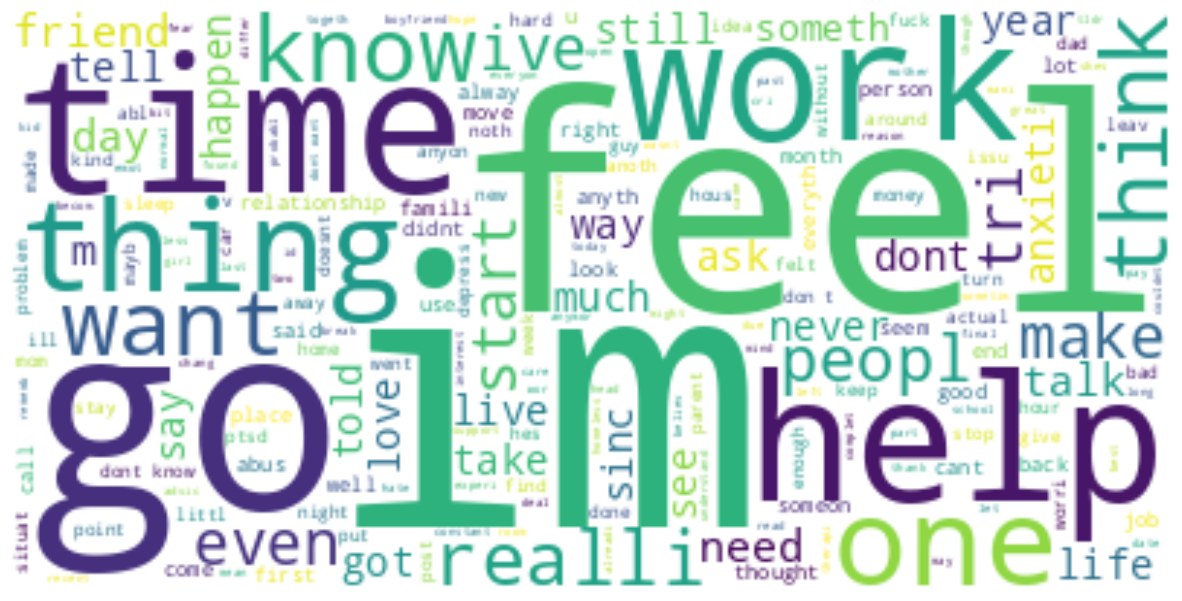

In [20]:
# We will generate a word cloud visualization based on the text data in your DataFrame's 'text' column
text = " ".join(i for i in df.text)
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
df["label"] = df["label"].map({0:"No Stress", 1:"Stress"})
final_df = df[["text","label"]]
print(final_df.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress
